
# <span style="color:rgb(213,80,0)">**Tutorial: SetGeom + MeshLayer**</span>


In [1]:
% Define a "geom" structure with geometric parameters by using
% Gielis Superformula to create a mesh (see also TutoSuperformula.mlx)
%
% Layers are defined from top to bottom
%
% Geom = SetGeom('Param1',Val1,'Param2',Val2,...);
% Mesh = MeshLayer(Geom);        % Mesh the structure
% VisuMesh(Mesh,NumSD,str,alpha) % str: edge color or 'none' ; alpha : Transparency
%
geom = SetGeom();
disp(geom.Help)

       hc: 'Layer thickness [hc_1 ..hc_i..] (µm)'
       dx: 'Period in x-axis (µm)'
       dy: 'Period in y-axis (µm)'
       mn: 'Superformula parameters [m, n1, n2, n3]'
       ab: 'Radius [a b] respectively in x and y (µm)'
    Angle: 'Angle of inclusion rotation (rd)'
      Dep: 'Translation in x and y (µm)'
    NumSD: 'Subdomain number of inclusions, otherwise =1 for all inclusions'
       Np: 'Number of points for inclusion drawing (Np = 401 by default)'
      npx: 'Number of nodes in x (by default npx=2 as min value per inclusion)'
      npy: 'Number of nodes in y (as npx)'
      npz: 'Number of nodes in z, by default npz=2'
     Plot: '=1: Plot particules, 0: no plot'

# <span style="color:rgb(213,80,0)">**Lattice of cubic particules**</span>


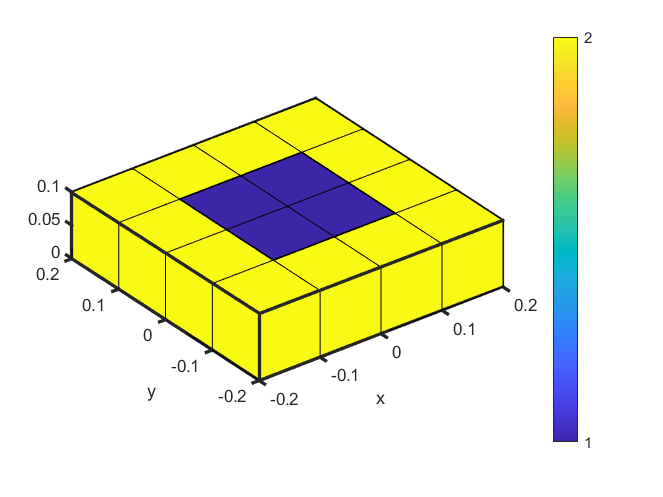

In [2]:
dx = .4;    % Period in x-axis (µm)
dy = .4;    % Period in y-axis
w1 = dx/2;  % Width of Inclusions in x
w2 = dy/2;  % Width of Inclusions in y
h = .1;     % Layer thickness
%
% with SuperFormula
Geom = SetGeom('hc',h,'dx',dx,'dy',dy,'mn',4,'ab',[w1/2 w2/2]);
%Geom = SetGeom('hc',h,'dx',dx,'dy',dy,'mn',[4 20 20 20],'ab',[w1/2 w2/2]);
%
Mesh = MeshLayer(Geom);
figure, VisuMesh(Mesh)

# <span style="color:rgb(213,80,0)">**Lattice of parallelepiped particules + Layer**</span>


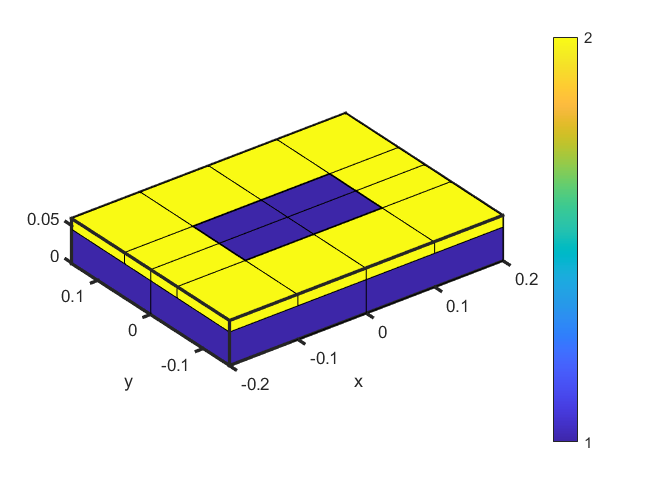

In [3]:
dx = .4;    % Period in x-axis (µm)
dy = .3;    % Period in y-axis
w1 = dx/2;  % Width of Inclusions in x
w2 = dy/3;  % Width of Inclusions in y
h = [.015 .045];     % Layer thickness
%
% with SuperFormula
Geom = SetGeom('dx',dx,'dy',dy,'mn',{4 []},'ab',{[w1/2 w2/2] []},'hc',h);
% Geom = SetGeom('dx',dx,'dy',dy,'mn',{4  4},'ab',{[w1/2 w2/2] [dx/2 dy/2]},'hc',h);

Mesh = MeshLayer(Geom);
figure, VisuMesh(Mesh)

# <span style="color:rgb(213,80,0)">**Lattice of concentric cubic particles**</span>


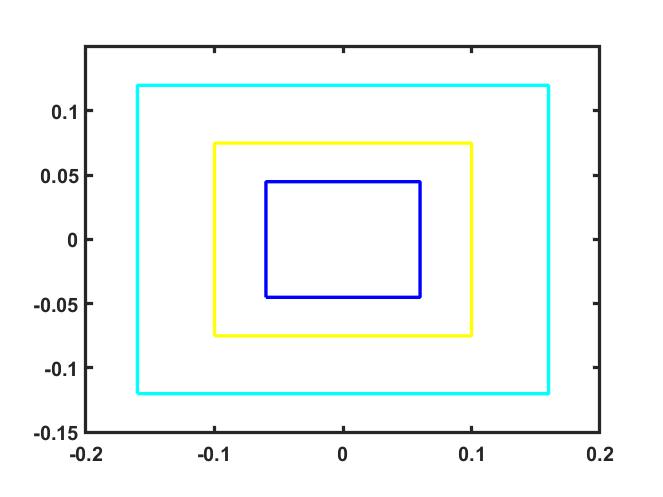

In [4]:
dx = .4;    % Period in x-axis (µm)
dy = .3;    % Period in y-axis
h = .1;     % Layer thickness
w1 = [.8*dx .5*dx .3*dx];  % Width of Inclusions in x
w2 = [.8*dy .5*dy .3*dy];  % Width of Inclusions in y

Geom = SetGeom('dx',dx,'dy',dy,'mn',[4;4;4],'NumSD',[3 2 1],'hc',h,'Plot',1,...
               'ab',[w1(:) w2(:)]/2);


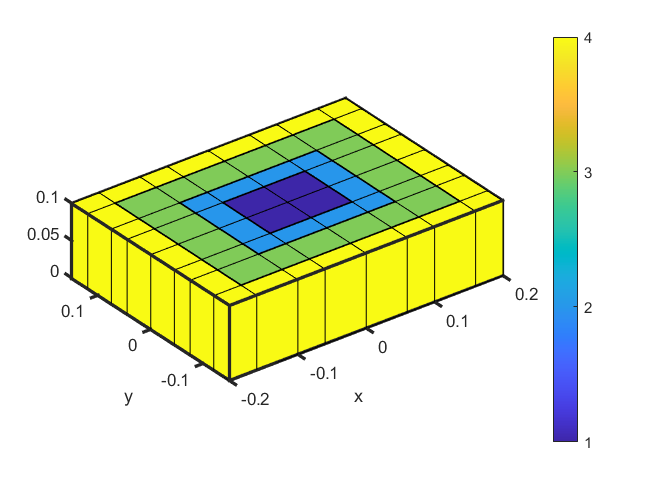

In [5]:
Mesh = MeshLayer(Geom);
figure, VisuMesh(Mesh)

# <span style="color:rgb(213,80,0)">**Lattice of cylindrical particles**</span>


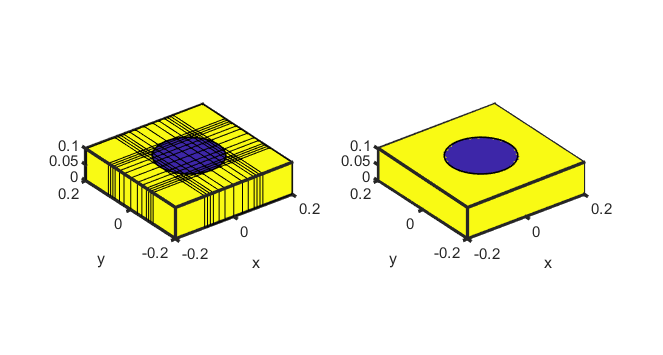

In [6]:
dx = .4;    % Period in x-axis (µm)
dy = .4;    % Period in y-axis
R = dx/4;   % radius of Inclusions
h = .1;     % Layer thickness
%
Geom = SetGeom('dx',dx,'dy',dy,'mn',[4 2 2 2],'ab',[R R],'hc',h,...
               'npx',[21 2],'npy',[21 2]);
%
Mesh = MeshLayer(Geom);
%
figure('Position',[300  300  560  300]),
subplot(121), VisuMesh(Mesh), colorbar off %
subplot(122), VisuMesh(Mesh,1:2,'none'), colorbar off % Plot without mesh

## Case of ellipse


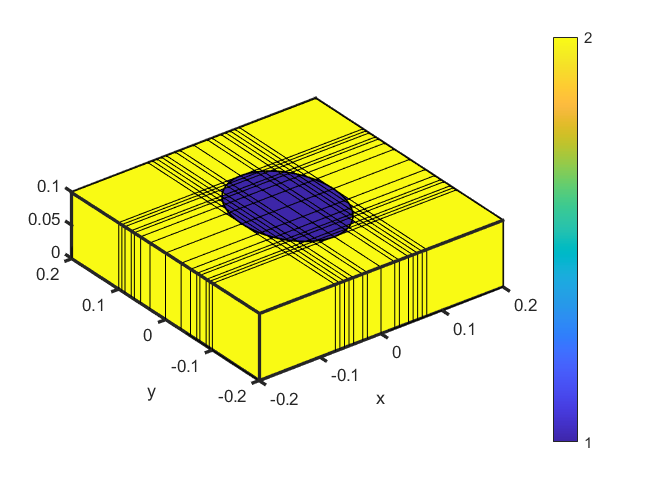

In [7]:
R1 = 0.75*dx/4; % Radius of Inclusions x-axis
R2 = dy/4;      % Radius of Inclusions y-axis

Geom = SetGeom(Geom,'ab',[R1 R2],'npy',[31 2]);
Mesh = MeshLayer(Geom);

figure, VisuMesh(Mesh)

# <span style="color:rgb(213,80,0)">**Lattice of cylindrical particles + coreshell**</span>


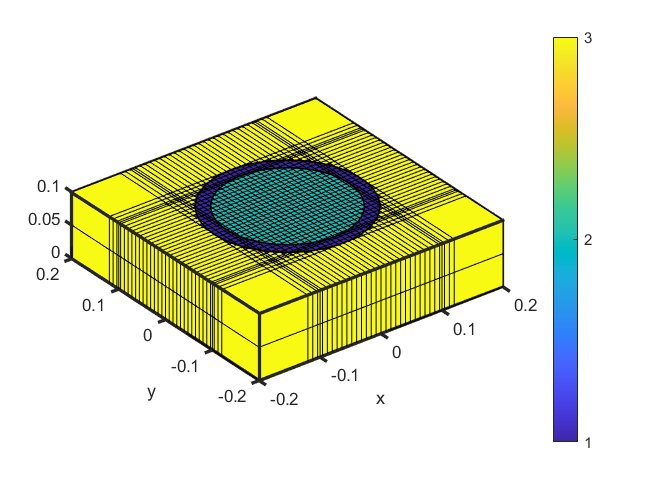

In [8]:
dx = .4;    % Period in x-axis (µm)
dy = .4;    % Period in y-axis
R = dx/4;   % Radius of Inclusions
h = .1;     % Layer thickness
e = dx/20;  % Core-shell thickness

Geom = SetGeom('dx',dx,'dy',dy,'mn',[4 2 2 2; 4 2 2 2],'ab',[R+e R+e; R R],...
               'hc',h,'npx',[31 2],'npy',[31 2],'npz',3,'NumSD',[1 2]);
%
Mesh = MeshLayer(Geom);
figure, VisuMesh(Mesh)

# <span style="color:rgb(213,80,0)"> **Lattice of cylindrical particles + multilayers** </span>


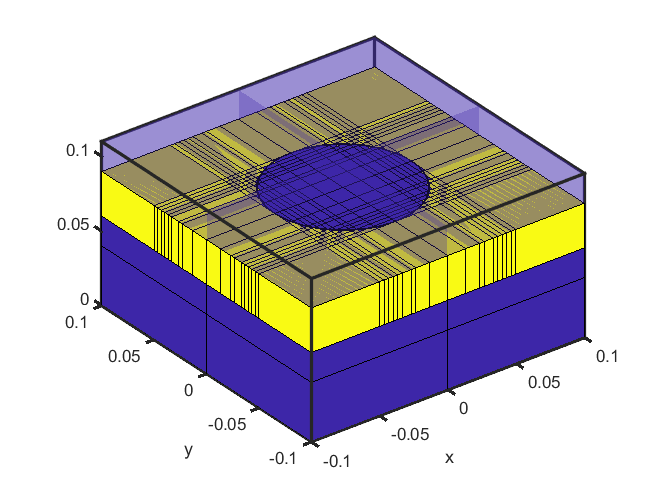

In [9]:
dx = .2;    % Period in x-axis (µm)
dy = .2;    % Period in y-axis
R = dx/4;   % Radius of Inclusions
h = [ .02 .03 .02 .04];  % Layer thickness

Geom = SetGeom('dx',dx,'dy',dy,'mn',{ [] [4 2 2 2] [] []},...
               'ab',{ [] [R R] [] []},...
               'hc',h,'npx',{ 2 31 2 2},'npy',{ 2 31 2 2});
%
Mesh = MeshLayer(Geom);
figure, VisuMesh(Mesh(1:3))
VisuMesh(Mesh(4),1,'none',0.3), colorbar off


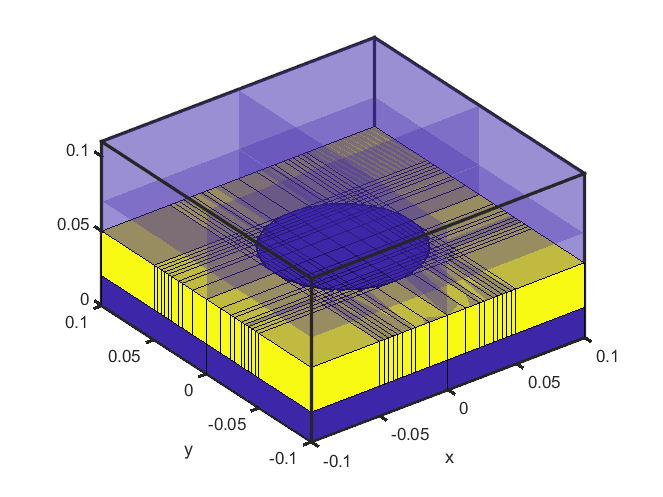

In [10]:
% Flip layers in up/down direction
% Mesh = MeshLayer(Geom,CoefFlip);   % CoefFlip : =1 to flip layers in up/down direction

Mesh = MeshLayer(Geom,1);  % or Mesh = MeshLayer(FlipUD(util(Geom)));
figure, VisuMesh(Mesh(1:2))
VisuMesh(Mesh(3:4),1,'none',0.3), colorbar off

# <span style="color:rgb(213,80,0)">**Lattice of cross\-shaped particles**</span>


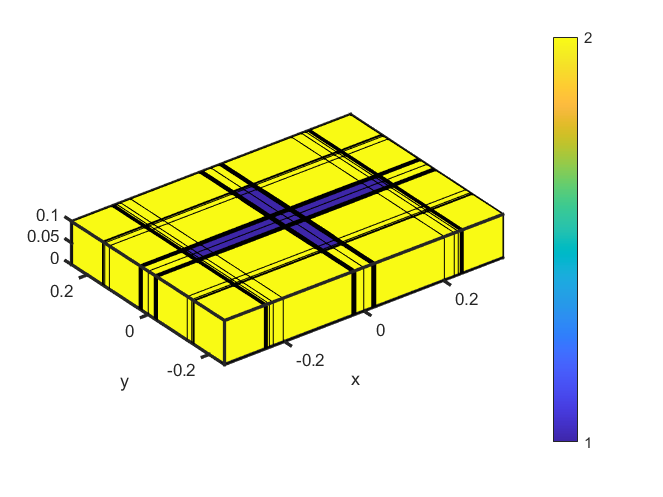

In [11]:
dx = .7;    % Period in x-axis (µm)
dy = .5;    % Period in y-axis
h = .1;     % Layer thickness

Geom = SetGeom('dx',dx,'dy',dy,'mn',[4 8 8 8;4 8 8 8],...
                'ab',[.5 .06; .06 .3]/2,'hc',h,...
                'npx',[201 2],'npy',[201 2]);

Mesh = MeshLayer(Geom);
figure, VisuMesh(Mesh,1:2)

## Without rounding


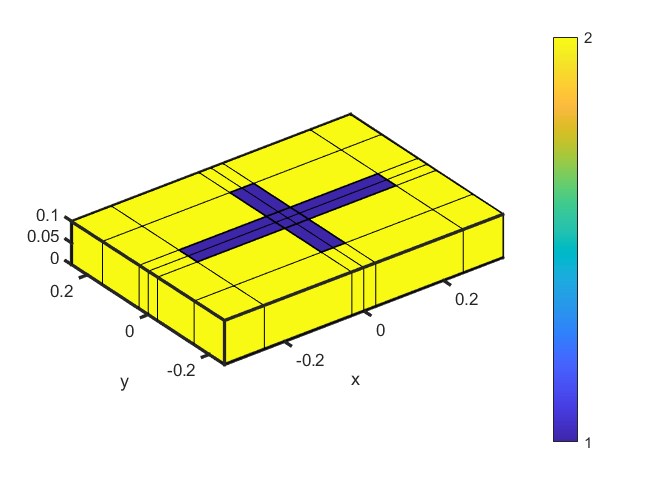

In [12]:
Geom = SetGeom('dx',dx,'dy',dy,'mn',[4 ; 4],...
               'ab',[.5 .06; .06 .3]/2,'hc',h);
%
Mesh = MeshLayer(Geom);
figure, VisuMesh(Mesh)

# <span style="color:rgb(213,80,0)">**Bowtie nanoantenna arrays  + substrat**</span>


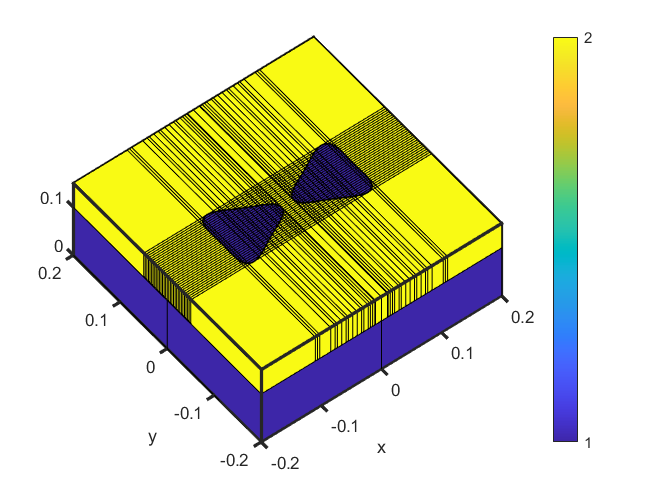

In [13]:
dx = .4;      % Period in x-axis (µm)
dy = .4;      % Period in y-axis
h = [.05 .1]; % Layer thickness
w = .1;       % Width of a particle
e = .02;      % Gap between two particles

Geom = SetGeom('dx',dx,'dy',dy,'mn',{[3 3 6 6;3 3 6 6] []},...
               'ab',{[ w w ; w w]/2 []},'hc',h,'Angle',{[0 pi] []},...
               'Dep',{[(w+e)/2 0; -(w+e)/2 0] []},...
               'npx',{[61 2] 2},'npy',{[31 2] 2});

Mesh = MeshLayer(Geom);
figure, VisuMesh(Mesh), view([-38 51])

# <span style="color:rgb(213,80,0)">**Grating 1D parallel to x\-axis**</span>


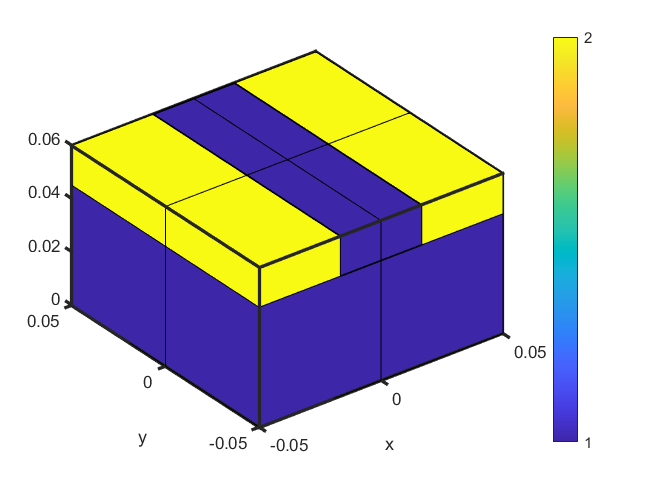

In [14]:
dx = .1; % Period in x-axis (µm)
h = [.015 .045]; % Layer thickness
w = dx/3; % Line width

Geom = SetGeom('dx',dx,'mn',{4 []},'ab',{[w/2 inf] [] },'hc',h);
Mesh = MeshLayer(Geom);
figure, VisuMesh(Mesh)



# <span style="color:rgb(213,80,0)"> **Lattice of** **<samp>butterfly-shaped</samp>** **nanoparticles** </span>


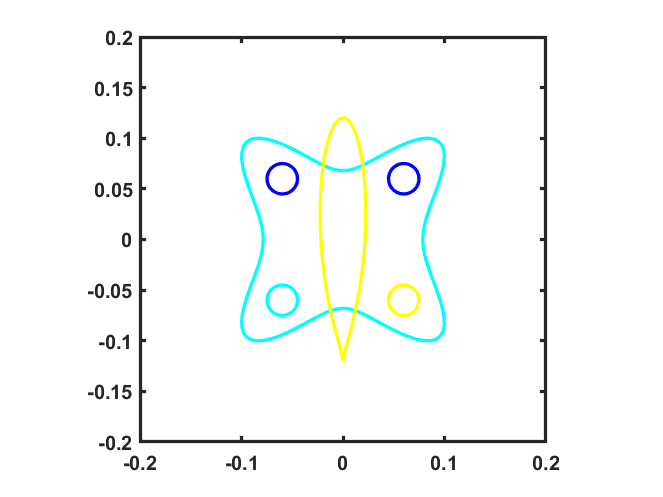

In [15]:
dx = .4;    % Period in x-axis (µm)
dy = .4;    % Period in y-axis
R = dx/4;   % Radius of Inclusion
h = [.03 .1];     % Layer thickness
r = .015;   % Radius of disk
a = 0.6*R;  % Distance fron the center

Geom = SetGeom('dx',dx,'dy',dy,...
            'mn',{[4 2 4 8; 1 .5 .8 .8;repmat([4 2 2 2],4,1)] []},...
            'ab',{[R R; 1.2*R 1.5*r;repmat([r r],4,1)] []},...
            'hc',h,'NumSD',{[2 1 3 3 3 3] []},...
            'npx',{[41 2] 2},'npy',{[41 2] 2},...
            'Plot',1,'Angle',{[0 -pi/2 0 0 0 0] []},...
            'Dep',{[0 0; 0 0; a a; -a a; -a -a; a -a] []});


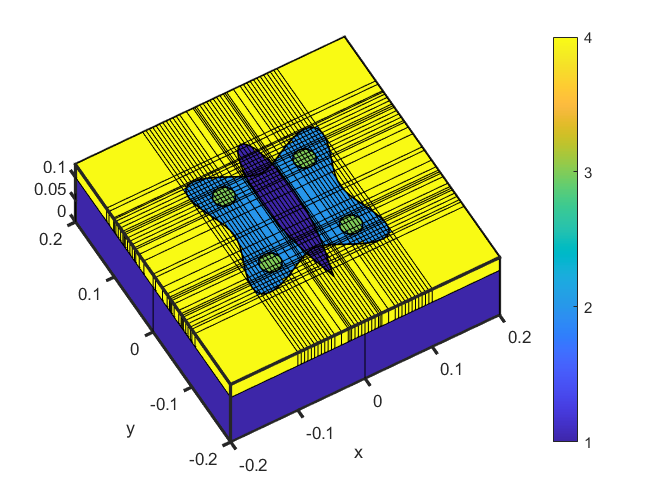

In [16]:
%
Mesh = MeshLayer(Geom);
figure, VisuMesh(Mesh), view([-30 55])

# <span style="color:rgb(213,80,0)">**Lattice of pyramidal nanoparticles**</span>


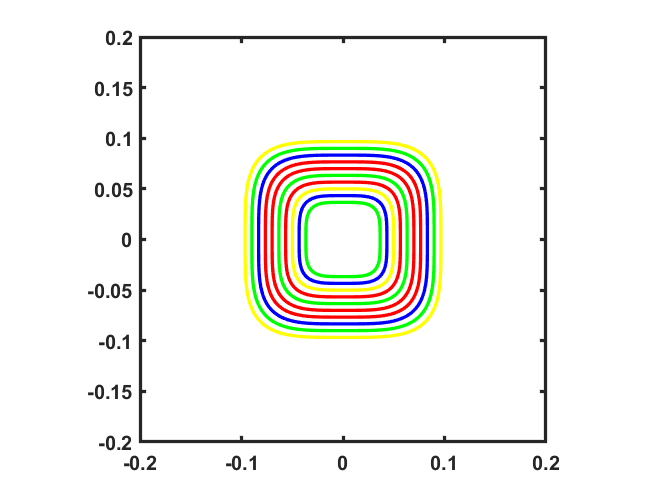

In [17]:
dx = .4;    % Period in x-axis (µm)
dy = .4;    % Period in y-axis
h = .2;     % Layer thickness
wb = dx/2;  % Width of the base
wh = dx/6;  % Width at the top
N = 10;     % Number of layers
%
w = wh/2+(wb/2-wh/2)*(1-(2*(N:-1:1)-1)/(2*N)); % radius of particle per layer
ab = cell(1,N); for k = 1:N, ab{k} = [w(k) w(k)]; end
%
% without rounding (npx=npy=2)
Geom = SetGeom('dx',dx,'dy',dy,'mn',repmat({[4 4 4 4]},1,N),...
               'ab',ab,'Plot',1,'hc',h/N*ones(1,N));


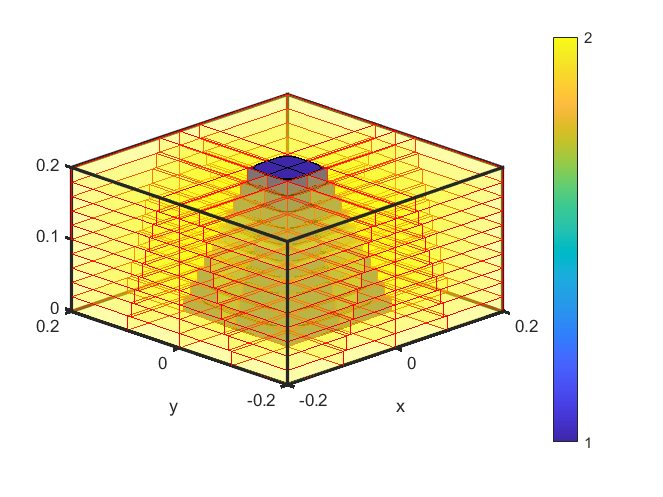

In [18]:
Mesh = MeshLayer(Geom);
figure, VisuMesh(Mesh,1),
VisuMesh(Mesh,2,'r',.2), view([-45 20])


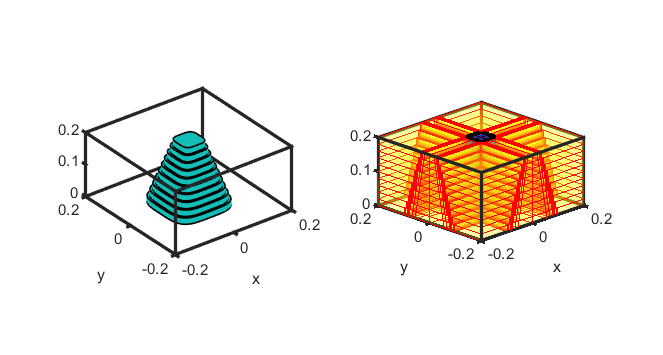

In [19]:
%
Geom = SetGeom(Geom,'npx',[41 2],'npy',[41 2],'Plot',0);
Mesh = MeshLayer(Geom);
figure('Position',[300  300  560  300]),
subplot(121), VisuMesh(Mesh,1,'none'), colorbar off
subplot(122), VisuMesh(Mesh,1),
VisuMesh(Mesh,2,'r',.2), view([-45 20]),colorbar off

# <span style="color:rgb(213,80,0)">**Lattice of nanopheres**</span>


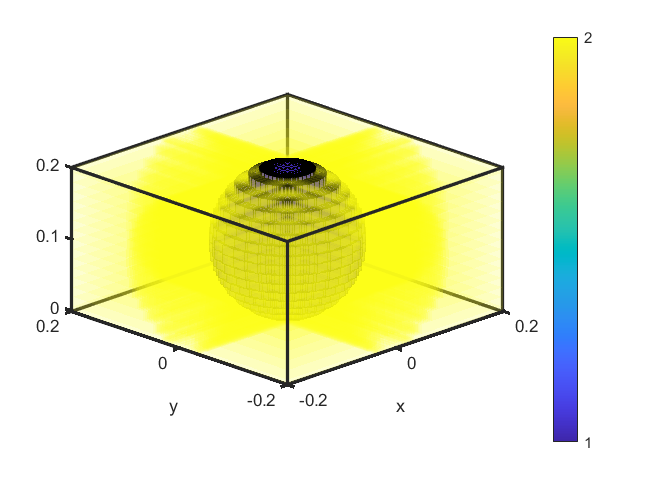

In [20]:
dx = .4;    % Period in x-axis (µm)
dy = .4;    % Period in y-axis
r = dx/4;   % Radius of the sphere
N = 15;     % Number of layers
%
wk = 2*[sqrt(r^2 - ((N-1:-1:ceil(N/2)+1)*2*r/N-r).^2) sqrt(r^2 - (r-(ceil(N/2):-1:1)*2*r/N).^2)];
w = [2*sqrt(r^2-((N/2-1/2)*2*r/N)^2) , wk , 2*sqrt(r^2-((N/2-1/2)*2*r/N)^2)];
%
ab = cell(1,N+1);
for k = 1:N+1, ab{k} = [w(k) w(k)]/2; end
%
Geom = SetGeom('dx',dx,'dy',dy,'mn',repmat({[4 2 2 2]},1,N+1),...
               'ab',ab,'hc',[r/N 2*r/N*ones(1,N-1) r/N],...
               'npx',[41 2],'npy',[41 2]);
%
Mesh = MeshLayer(Geom);
%
figure, VisuMesh(Mesh,1),
VisuMesh(Mesh,2,'none',.1), view([-45 20])

# <span style="color:rgb(213,80,0)">**Blazed 1D grating**</span>


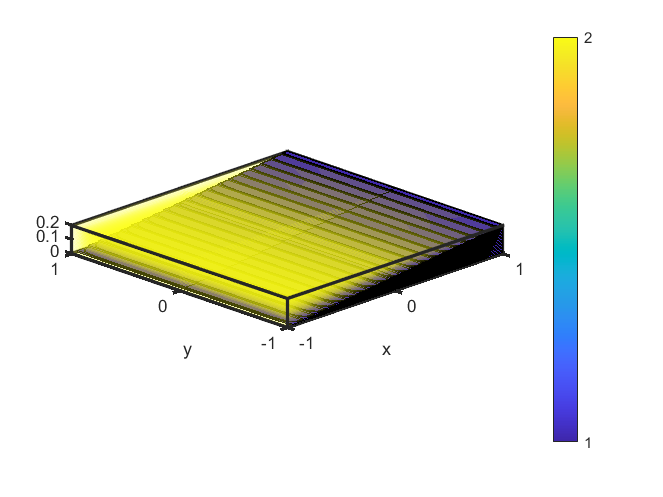

In [21]:
dx = 2;    % Period in x-axis (µm)
h = .2;     % Layer thickness
wx = dx;    % Width of the base
N = 20;     % Number of layers
%
w = wx*(1-(2*(N:-1:1)-1)/(2*N));; % Width of particule per layer
[ab,Dep] = deal(cell(1,N));
for k = 1:N, ab{k} = [w(k)/2 inf]; Dep{k} = [-w(k)/2+dx/2 0]; end
%
% without rounding (npx=npy=2)
Geom = SetGeom('dx',dx,'mn',repmat({[4 20 20 20]},1,N),...
               'ab',ab,'hc',h/N*ones(1,N),'Dep',Dep);
%
Mesh = MeshLayer(Geom);
%
figure, VisuMesh(Mesh,1),
VisuMesh(Mesh,2,'none',.1), view([-45 20])